In [1]:
import pandas as pd
import numpy as np

#classes and functions for the estimation of many different statistical models, as well as for conducting 
#statistical tests, and statistical data exploration
#An extensive list of result statistics are available for each estimator

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pylab as plt
import matplotlib.dates as dates
from matplotlib.pylab import rcParams


rcParams['figure.figsize'] = 15, 6

/Users/chandanarao/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
#reading the csv
data_master = pd.read_csv("sp_500_ts.csv")

In [17]:
#converting the csv and getting the sp_500 column to a list
sp_500 = data_master['sp_500']

In [4]:
print(sp_500.head(12))

0     464.547500
1     479.072510
2     493.987503
3     507.725006
4     523.650009
5     538.805008
6     553.680008
7     560.649994
8     573.727493
9     582.029983
10    594.149994
11    612.307495
Name: sp_500, dtype: float64


In [5]:
#converting the index to a datetime object for making a time series
sp_500_range = pd.date_range('1995-01','2016-1',freq='M')

In [6]:
#making a time series using the data and the converted index
ts = pd.Series(data_master['sp_500'].values, index = sp_500_range)

In [7]:
print(ts.head(12))

1995-01-31    464.547500
1995-02-28    479.072510
1995-03-31    493.987503
1995-04-30    507.725006
1995-05-31    523.650009
1995-06-30    538.805008
1995-07-31    553.680008
1995-08-31    560.649994
1995-09-30    573.727493
1995-10-31    582.029983
1995-11-30    594.149994
1995-12-31    612.307495
Freq: M, dtype: float64


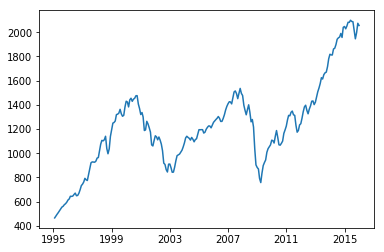

In [8]:
#initial plot of the time series
plt.plot(ts)

In [11]:
#making a training set
sp500_TR = ts['1995':'2014']

/Users/chandanarao/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


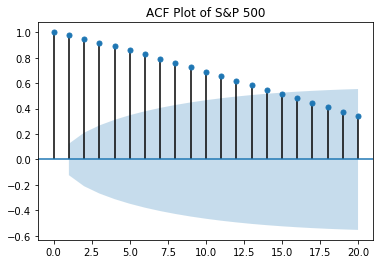

In [20]:
#getting the ACF plot for 20 lags
ACF = plot_acf(ts, lags=20)
plt.title("ACF Plot of S&P 500")
ACF.show()

/Users/chandanarao/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


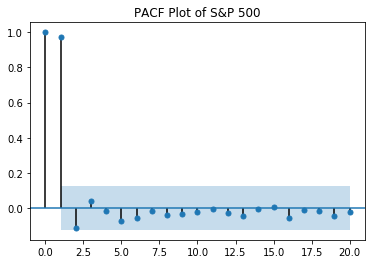

In [21]:
#getting the PACF plot for 20 lags
PACF = plot_pacf(ts,lags=20)
plt.title("PACF Plot of S&P 500")
PACF.show()

In [22]:
#adjusting for stationarity of time series
sp500_diff = ts - ts.shift()

In [23]:
diff = sp500_diff.dropna()

In [25]:
print (diff.head())

1995-02-28    14.525010
1995-03-31    14.914993
1995-04-30    13.737503
1995-05-31    15.925003
1995-06-30    15.154999
Freq: M, dtype: float64


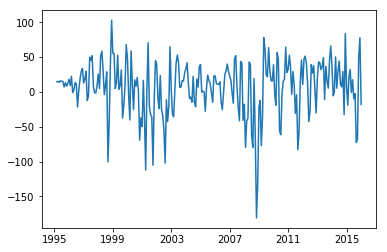

In [26]:
plt.plot(diff)

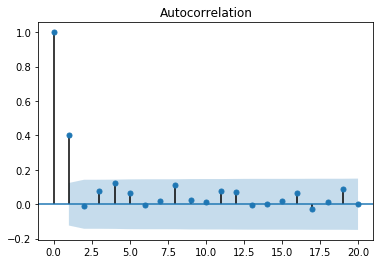

In [27]:
ACF_diff = plot_acf(diff, lags=20)

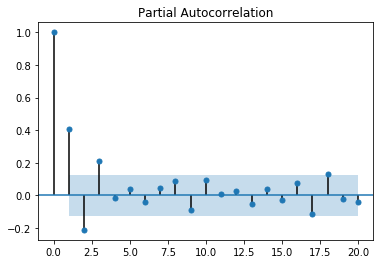

In [28]:
PACF_diff = plot_pacf(diff, lags=20)

In [29]:
#from the ACF and PACF plot we get the integrated or differencing value of 1 and the MA value from ACF plot to be 1 as well. 
#now we build our model after finalising our parameters as 0,1,1

model = ARIMA(sp500_TR, order = (0,1,1), freq='M')

In [30]:
results = model.fit()

/Users/chandanarao/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/chandanarao/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [31]:
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  239
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1181.583
Method:                       css-mle   S.D. of innovations             33.924
Date:                Tue, 26 Jun 2018   AIC                           2369.165
Time:                        18:25:11   BIC                           2379.595
Sample:                    02-28-1995   HQIC                          2373.368
                         - 12-31-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4928      3.433      1.892      0.060      -0.235      13.221
ma.L1.D.y      0.5666      0.055     10.282      0.000       0.459       0.675
                                    Roots           

/Users/chandanarao/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/chandanarao/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [41]:
#using the built model to forecast values

predicted_values = results.predict(239,251, typ='levels')

/Users/chandanarao/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [42]:
print(predicted_values)

2014-12-31    2107.259223
2015-01-31    2020.444189
2015-02-28    2026.937021
2015-03-31    2033.429853
2015-04-30    2039.922685
2015-05-31    2046.415517
2015-06-30    2052.908349
2015-07-31    2059.401181
2015-08-31    2065.894013
2015-09-30    2072.386845
2015-10-31    2078.879678
2015-11-30    2085.372510
2015-12-31    2091.865342
Freq: M, dtype: float64


In [43]:
predicted_values = predicted_values.drop(predicted_values.index[0])
#predVals = predVals.drop(predVals.index[0])
#print predVals

#sp500_for = pd.concat([ts, predVals], axis = 1, keys=['original', 'predicted'])
#print sp500_for['2014':'2015']

#plt.figure()
#plt.plot(sp500_for)
#plt.title("Actual Vs. Forecasted Values")
#plt.savefig("images/sp500_for.png", format = 'png')
#plt.show()

#plt.figure()
#plt.plot(sp500_for)
#plt.title('Real Vs. Predicted Values for 2015')
#plt.savefig("images/sp500_for2.png", format = 'png')
#plt.show()


In [44]:
sp500_forecast = pd.concat([ts,predicted_values], axis = 1, keys=['original', 'predicted'])

In [40]:
print(sp500_forecast['2014':'2015'])

               original    predicted
2014-01-31  1812.434967          NaN
2014-02-28  1811.992523          NaN
2014-03-31  1862.107483          NaN
2014-04-30  1867.387482          NaN
2014-05-31  1897.945007          NaN
2014-06-30  1942.062500          NaN
2014-07-31  1953.755036          NaN
2014-08-31  1960.747528          NaN
2014-09-30  1989.915009          NaN
2014-10-31  1957.084991          NaN
2014-11-30  2040.635010          NaN
2014-12-31  2047.697510          NaN
2015-01-31  2028.592499          NaN
2015-02-28  2050.415039  2026.937021
2015-03-31  2082.582459  2033.429853
2015-04-30  2081.859925  2039.922685
2015-05-31  2099.354920  2046.415517
2015-06-30  2089.485046  2052.908349
2015-07-31  2086.920044  2059.401181
2015-08-31  2014.084992  2065.894013
2015-09-30  1945.722504  2072.386845
2015-10-31  1996.757538  2078.879678
2015-11-30  2074.259979  2085.372510
2015-12-31  2056.099976  2091.865342


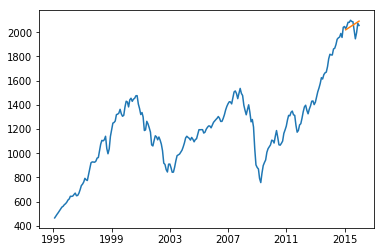

In [45]:
plt.plot(sp500_forecast)